### Proceso de extracción, transformación y limpieza de los datos (ETL) de la base de datos de reseñas de usuarios

Para comenzar, se importan las librerias necesarias

In [137]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
import ast
warnings.filterwarnings('ignore')
from langdetect import detect
import re
from scipy import stats

El archivo .json al que se le hará ETL tiene problemas para su apertura.

In [138]:
reseñas='australian_user_reviews.json'

In [139]:
def abrir_json(file):
    '''
    Abre archivo JSON. Retorna DataFrame de Pandas.
    '''
    try:
        data_list = []

        with open(file, 'r', encoding='utf-8') as file:
            for line in file:
                line = line.strip()
                try:
                    line = ast.literal_eval(line)
                    data_list.append(line)
                except (SyntaxError, ValueError) as e:
                    print(f"Error al evaluar la línea '{line}': {e}")

        if not data_list:
            raise ValueError("El archivo JSON está vacío o no contiene datos válidos.")

        df = pd.json_normalize(data_list, 'reviews', ['user_id', 'user_url'])

        return df

    except FileNotFoundError:
        print(f"Error: El archivo '{file}' no se encontró.")
    except Exception as e:
        print(f"Error inesperado: {e}")

reviews_file = '../Datasets/australian_user_reviews.json'

In [140]:
df_reseñas=abrir_json(reseñas)

In [141]:
df_reseñas.head()

,funny,posted,last_edited,item_id,helpful,recommend,review,user_id,user_url
0,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...,76561197970982479,http://steamcommunity.com/profiles/76561197970...
1,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.,76561197970982479,http://steamcommunity.com/profiles/76561197970...
2,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...,76561197970982479,http://steamcommunity.com/profiles/76561197970...
3,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...,js41637,http://steamcommunity.com/id/js41637
4,,"Posted September 8, 2013.",,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...,js41637,http://steamcommunity.com/id/js41637


Se cargan en el dataframe las columnas a emplear

In [142]:
utiles=['user_id', 'posted', 'review', 'item_id', 'recommend']
df_reseñas=df_reseñas[utiles]

In [143]:
df_reseñas.tail(30)

,user_id,posted,review,item_id,recommend
59275,CaptainAmericaCw,Posted June 11.,Please help when i try and go into Youtubers L...,428690,True
59276,76561198267374962,"Posted December 29, 2015.",Why I voted yes? 1. Girl characters have boobs...,369200,True
59277,KinkyyyCSGO,Posted March 6.,This is a good tool to use but has its ups and...,282660,True
59278,76561198270958927,Posted July 3.,"Fix your ♥♥♥♥ing game, de rank me for no reaso...",381210,True
59279,elasticgoose,Posted January 24.,yeah this game is heaps sik ay,440,True
59280,76561198272389051,Posted June 17.,Hi I don't know what this is,440,True
59281,MeloncraftLP,Posted August 13.,GET THIS GAME AND CHAPTER TWO!!!!!!!!!!!!!!!!!...,220090,True
59282,MeloncraftLP,Posted August 13.,THIS GAME!!!!!!!!!!!!!!!!!! WOOOOOOOOOOOOOOOOO...,262850,True
59283,MeloncraftLP,Posted July 27.,DON'T INSTALL THIS GAME!!!!!!!!!!!!!!!!!!!!!!!...,265630,False
59284,76561198277602337,Posted August 2.,"Game is terrible! So, Iv tried 15hrs tryin to ...",306130,False


Se verifica la información del dataframe

In [144]:
df_reseñas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59305 entries, 0 to 59304
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    59305 non-null  object
 1   posted     59305 non-null  object
 2   review     59305 non-null  object
 3   item_id    59305 non-null  object
 4   recommend  59305 non-null  bool  
dtypes: bool(1), object(4)
memory usage: 1.9+ MB


Se castean los tipos de datos de las columnas 'item_id' y 'recommend' a int. 

In [145]:
df_reseñas['item_id']=df_reseñas['item_id'].astype(int)
df_reseñas['recommend']=df_reseñas['recommend'].astype(int)  

In [146]:
df_reseñas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59305 entries, 0 to 59304
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    59305 non-null  object
 1   posted     59305 non-null  object
 2   review     59305 non-null  object
 3   item_id    59305 non-null  int64 
 4   recommend  59305 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 2.3+ MB


In [147]:
df_dummies=pd.get_dummies(df_reseñas['recommend'].astype(int))
df_reseñas=pd.concat([df_reseñas, df_dummies], axis=1)
df_reseñas.drop('recommend', axis=1, inplace=True)

In [148]:
df_reseñas.head(6)

,user_id,posted,review,item_id,0,1
0,76561197970982479,"Posted November 5, 2011.",Simple yet with great replayability. In my opi...,1250,False,True
1,76561197970982479,"Posted July 15, 2011.",It's unique and worth a playthrough.,22200,False,True
2,76561197970982479,"Posted April 21, 2011.",Great atmosphere. The gunplay can be a bit chu...,43110,False,True
3,js41637,"Posted June 24, 2014.",I know what you think when you see this title ...,251610,False,True
4,js41637,"Posted September 8, 2013.",For a simple (it's actually not all that simpl...,227300,False,True
5,js41637,"Posted November 29, 2013.",Very fun little game to play when your bored o...,239030,False,True


Se reemplazan los espacios en blanco por valores nulos

In [149]:
df_reseñas.replace([' ', ''], np.nan, inplace=True) 

Se hace la sumatoria de los valores nulos presentes en el dataframe. Existen 38 valores nulos en la columna 'review', lo que implica un 6,41%.

In [150]:
df_reseñas.isna().sum()  

user_id     0
posted      0
review     38
item_id     0
0           0
1           0
dtype: int64

In [151]:
df_reseñas.isna().sum()*100/len(df_reseñas)

user_id    0.000000
posted     0.000000
review     0.064076
item_id    0.000000
0          0.000000
1          0.000000
dtype: float64

Se verifican los valores duplicados. Existen 874 valores duplicados en el dataframe. Se eliminan los valores duplicados.

In [152]:
df_reseñas.duplicated().sum()

np.int64(874)

In [153]:
df_reseñas.drop_duplicates(inplace= True)  

La columna 'review' tiene valores nulos que se conservan, ya que cuando se realice el análisis de sentimientos, quedan categorizados como neutros.

In [154]:
df_reseñas[df_reseñas['review'].isna()].head()

,user_id,posted,review,item_id,0,1
614,76561198070263209,"Posted December 13, 2013.",NaN,570,False,True
914,Azrafael,"Posted November 25, 2013.",NaN,215530,False,True
3095,2ZESTY4ME,Posted March 11.,NaN,550,False,True
4616,76561198093337643,"Posted September 19, 2014.",NaN,550,False,True
9347,BomberThink,"Posted November 25, 2013.",NaN,233840,False,True


Se genera una función para identificar idioma de las reseñas del dataframe.

In [155]:
def detectar_idioma(texto):
    try:
        return detect(texto)
    except:
        return None

# Aplicar la función para detectar idioma y crear una nueva columna 'language'
df_reseñas['language'] = df_reseñas['review'].apply(detectar_idioma)

# Calcular el conteo y porcentaje de cada idioma
conteo_por_idioma = df_reseñas['language'].value_counts()
porcentaje_por_idioma = df_reseñas['language'].value_counts(normalize=True) * 100

# Crear un nuevo DataFrame con el conteo y porcentaje
resumen_idiomas = pd.DataFrame({
    'Conteo': conteo_por_idioma,
    'Porcentaje': porcentaje_por_idioma.round(2).astype(str) + '%'
})

# Ordenar el DataFrame por el conteo de mayor a menor
resumen_idiomas = resumen_idiomas.sort_values(by='Conteo', ascending=False)
resumen_idiomas.head()

,Conteo,Porcentaje
language,,
en,45048,77.86%
pt,2162,3.74%
es,1267,2.19%
de,1133,1.96%
so,1014,1.75%


Observo los comentarios filtrados por idioma

In [156]:
pd.set_option('display.max_rows', None)

In [157]:
#reseñas en inglés
df_reseñas[df_reseñas['language']=='en'].head(10)

,user_id,posted,review,item_id,0,1,language
0,76561197970982479,"Posted November 5, 2011.",Simple yet with great replayability. In my opi...,1250,False,True,en
1,76561197970982479,"Posted July 15, 2011.",It's unique and worth a playthrough.,22200,False,True,en
2,76561197970982479,"Posted April 21, 2011.",Great atmosphere. The gunplay can be a bit chu...,43110,False,True,en
3,js41637,"Posted June 24, 2014.",I know what you think when you see this title ...,251610,False,True,en
4,js41637,"Posted September 8, 2013.",For a simple (it's actually not all that simpl...,227300,False,True,en
5,js41637,"Posted November 29, 2013.",Very fun little game to play when your bored o...,239030,False,True,en
6,evcentric,Posted February 3.,A suitably punishing roguelike platformer. Wi...,248820,False,True,en
7,evcentric,"Posted December 4, 2015.","""Run for fun? What the hell kind of fun is that?""",370360,False,True,en
8,evcentric,"Posted November 3, 2014.","Elegant integration of gameplay, story, world ...",237930,False,True,en
9,evcentric,"Posted October 15, 2014.","Random drops and random quests, with stat poin...",263360,False,True,en


In [158]:
#Reseñas en portugués
df_reseñas[df_reseñas['language']=='pt'].head(10)

,user_id,posted,review,item_id,0,1,language
33,76561198077246154,"Posted August 25, 2014.",É muito bom,304930,False,True,pt
92,diego9031,Posted July 30.,Vale a pena a pagar 20 R$ nesse jogo porque: ...,4000,False,True,pt
93,diego9031,Posted July 28.,Tem Slow-Motion Tem tiro Precisa de mais p...,317360,False,True,pt
94,diego9031,"Posted December 5, 2015.",-NO-NO-NO10/10,223710,False,True,pt
95,diego9031,"Posted October 4, 2015.",-Jogabilidade ótima;-Tiro pra c@$#&*#;-Pessoas...,299360,False,True,pt
96,diego9031,"Posted October 3, 2015.",-Tem o mod do Daniel Orivaldo da Silva;-Mundo ...,322330,False,True,pt
97,diego9031,"Posted August 13, 2015.",Jogo ♥♥♥♥.,1250,False,True,pt
98,diego9031,"Posted February 22, 2015.",Nao funciona com controle,12100,False,True,pt
170,76561198093112529,"Posted August 9, 2014.",po cem palavras XD,440,False,True,pt
175,76561198081962345,"Posted April 5, 2014.",cara nas imagens esse jogo da pouco de medo ma...,1250,False,True,pt


In [159]:
#Reseñas en español
df_reseñas[df_reseñas['language']=='es'].head(10)

,user_id,posted,review,item_id,0,1,language
54,Fr0stedLine,Posted February 27.,Hermoso juego que nunca olvidare <3,220,False,True,es
105,76561198079770573,"Posted October 14, 2015.",es muy increible OwO,1840,False,True,es
317,EizanAratoFujimaki,"Posted October 28, 2015.",ADVERTENCIA:Este Análisis contiene posibles Sp...,70,False,True,es
318,EizanAratoFujimaki,Posted April 15.,Me sale un error de NAT estricto y me da paja ...,359550,True,False,es
329,washington_,Posted August 19.,space,211820,False,True,es
527,76561198092227136,"Posted September 11, 2014.",Este juego csgo es muy bueno me gusta good,730,False,True,es
528,76561198092227136,"Posted May 26, 2014.",este juego es muy bueno,1250,False,True,es
547,I_DID_911_JUST_SAYING,"Posted May 6, 2013.",fun game for pryos,221260,False,True,es
579,TomoeMamiewe,"Posted February 16, 2014.",buenisiiimo juego es un vicio ewe,10150,False,True,es
580,TomoeMamiewe,Posted June 24.,bueno pa jugar con amigos :v,4000,False,True,es


In [160]:
#Reseñas en alemán. Aparecen algunas que son inglés como si fueran alemán. 
# Esto es porque las palabras fueron deformadas con la intención de expresar una emoción positiva.
df_reseñas[df_reseñas['language']=='de'].head(10)

,user_id,posted,review,item_id,0,1,language
27,76561198079601835,Posted May 20.,ZIKA DO BAILE,730,False,True,de
71,76561198076909484,"Posted June 18, 2014.",GOD GAME,570,False,True,de
159,Coldaniel,"Posted August 21, 2014.",EXECELLENT GAME GIVE 10/10 NEVER STOP PLAYING ...,440,False,True,de
176,76561198073210139,Posted January 18.,THIS GAME IS LIKE A ♥♥♥♥♥♥♥♥ VERSION OF MINECR...,304050,False,True,de
192,76561198056290589,"Posted December 16, 2014.",BEST GAME EVAR,730,False,True,de
216,kevinator23,"Posted January 25, 2015.",Better than MineCraft,219740,False,True,de
258,Koolcaz12,Posted May 17.,Stellaris is better.,298050,True,False,de
274,DemonicWolvz,"Posted March 29, 2015.",AN ENDLESS AMOUNT OF EVERYTHING!,4000,False,True,de
349,76561198109656922,Posted March 27.,Best Game 2016,440,False,True,de
380,76561198060039459,"Posted October 4, 2014.",DOTA SUX.,570,True,False,de


In [161]:
#Reseñas en somalí. No es somalí, es inglés con palabras deformadas con la intención de expresar una emoción positiva.
df_reseñas[df_reseñas['language']=='so'].head(10)

,user_id,posted,review,item_id,0,1,language
34,WeiEDKrSat,"Posted December 25, 2013.",es la rajaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...,4000,False,True,so
46,Rainbow-Dashie,"Posted September 20, 2014.",Good game,440,False,True,so
228,76561198102410011,"Posted September 14, 2015.",abc,440,False,True,so
365,smashiroshh,"Posted December 30, 2014.",Good game,218620,False,True,so
436,76561198075322986,Posted March 30.,SHUUUNDA!!!,730,False,True,so
467,76561198076098774,"Posted August 2, 2015.",Good,215080,False,True,so
574,express157,"Posted September 2, 2014.",good game,304930,False,True,so
715,AngryAinsley,"Posted July 24, 2015.",Good game.,295110,False,True,so
778,bilyitu,"Posted October 6, 2014.",AWASOME!,570,False,True,so
779,bilyitu,"Posted September 8, 2014.",boom! boom! awp! ♥♥♥♥! noob! hacks! boom again.,730,False,True,so


Se pudo evidenciar que la mayoría de reseñas están en inglés.
Ya que se cumplió el objetivo de entender la manera en la que se distribuían los idiomas, elimino la columna 'language'

In [162]:
df_reseñas.drop(columns='language', inplace=True)

In [163]:
df_reseñas.head(5)

,user_id,posted,review,item_id,0,1
0,76561197970982479,"Posted November 5, 2011.",Simple yet with great replayability. In my opi...,1250,False,True
1,76561197970982479,"Posted July 15, 2011.",It's unique and worth a playthrough.,22200,False,True
2,76561197970982479,"Posted April 21, 2011.",Great atmosphere. The gunplay can be a bit chu...,43110,False,True
3,js41637,"Posted June 24, 2014.",I know what you think when you see this title ...,251610,False,True
4,js41637,"Posted September 8, 2013.",For a simple (it's actually not all that simpl...,227300,False,True


In [164]:
df_reseñas['posted'].head(10)

0     Posted November 5, 2011.
1        Posted July 15, 2011.
2       Posted April 21, 2011.
3        Posted June 24, 2014.
4    Posted September 8, 2013.
5    Posted November 29, 2013.
6           Posted February 3.
7     Posted December 4, 2015.
8     Posted November 3, 2014.
9     Posted October 15, 2014.
Name: posted, dtype: object

In [165]:
def extraer_año(fecha):
    '''Esta función las fechas de un conjunto de datos'''
    match = re.search(r'\b\d{4}\b', fecha)
    return int(match.group()) if match else np.nan

In [166]:
df_reseñas['Año']=df_reseñas['posted'].apply(extraer_año)

In [167]:
df_reseñas.head(10)

,user_id,posted,review,item_id,0,1,Año
0,76561197970982479,"Posted November 5, 2011.",Simple yet with great replayability. In my opi...,1250,False,True,2011.0
1,76561197970982479,"Posted July 15, 2011.",It's unique and worth a playthrough.,22200,False,True,2011.0
2,76561197970982479,"Posted April 21, 2011.",Great atmosphere. The gunplay can be a bit chu...,43110,False,True,2011.0
3,js41637,"Posted June 24, 2014.",I know what you think when you see this title ...,251610,False,True,2014.0
4,js41637,"Posted September 8, 2013.",For a simple (it's actually not all that simpl...,227300,False,True,2013.0
5,js41637,"Posted November 29, 2013.",Very fun little game to play when your bored o...,239030,False,True,2013.0
6,evcentric,Posted February 3.,A suitably punishing roguelike platformer. Wi...,248820,False,True,NaN
7,evcentric,"Posted December 4, 2015.","""Run for fun? What the hell kind of fun is that?""",370360,False,True,2015.0
8,evcentric,"Posted November 3, 2014.","Elegant integration of gameplay, story, world ...",237930,False,True,2014.0
9,evcentric,"Posted October 15, 2014.","Random drops and random quests, with stat poin...",263360,False,True,2014.0


Se elimina la columna 'posted' ya que cumplió la función que se requería.

In [169]:
df_reseñas.drop(columns='posted', inplace=True)

KeyError: "['posted'] not found in axis"

In [170]:
df_reseñas.head(10)

,user_id,review,item_id,0,1,Año
0,76561197970982479,Simple yet with great replayability. In my opi...,1250,False,True,2011.0
1,76561197970982479,It's unique and worth a playthrough.,22200,False,True,2011.0
2,76561197970982479,Great atmosphere. The gunplay can be a bit chu...,43110,False,True,2011.0
3,js41637,I know what you think when you see this title ...,251610,False,True,2014.0
4,js41637,For a simple (it's actually not all that simpl...,227300,False,True,2013.0
5,js41637,Very fun little game to play when your bored o...,239030,False,True,2013.0
6,evcentric,A suitably punishing roguelike platformer. Wi...,248820,False,True,NaN
7,evcentric,"""Run for fun? What the hell kind of fun is that?""",370360,False,True,2015.0
8,evcentric,"Elegant integration of gameplay, story, world ...",237930,False,True,2014.0
9,evcentric,"Random drops and random quests, with stat poin...",263360,False,True,2014.0


Se cuenta la cantidad de valores nulos, se hace un histograma y un mapa de calor para identificar la manera en la que se distribuyen los datos. Se tiene un 6,5% de valores nulos en la columna 'review' y un 17% de valores nulos en la columna 'año'

In [171]:
df_reseñas.isna().sum()

user_id       0
review       38
item_id       0
0             0
1             0
Año        9933
dtype: int64

In [172]:
df_reseñas.isna().sum()*100/len(df_reseñas)

user_id     0.000000
review      0.065034
item_id     0.000000
0           0.000000
1           0.000000
Año        16.999538
dtype: float64

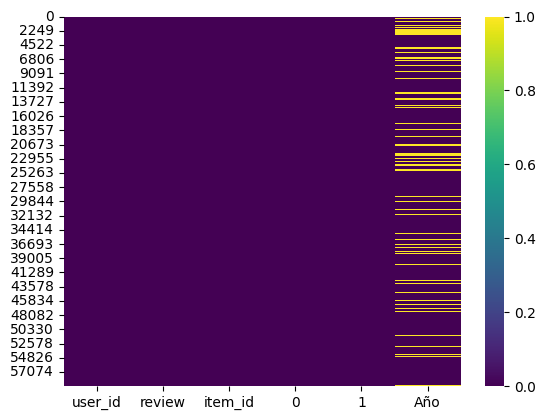

In [173]:
sns.heatmap(df_reseñas.isna(), cmap='viridis');

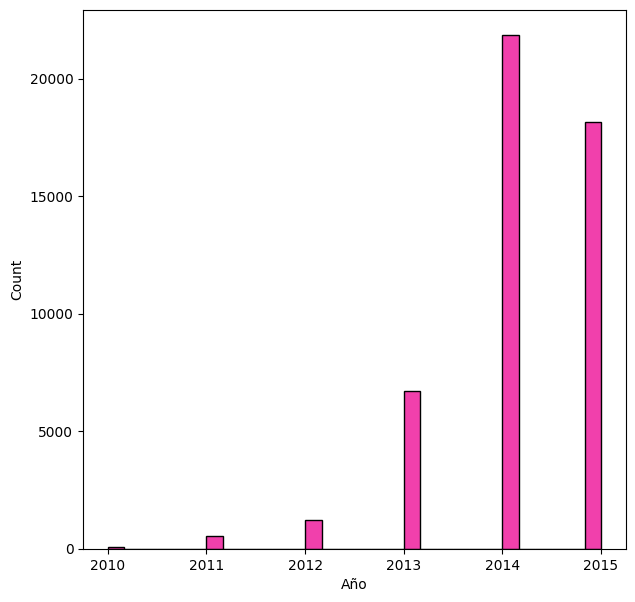

In [174]:
plt.figure(figsize=(7,7))
sns.histplot(df_reseñas['Año'], bins=30, color= '#ed0091');

Para identificar qué item tuvo más comentarios por año, se genera un dataframe con la moda del año agrupada por item y se une al dataframe original

In [175]:
df_item_año=df_reseñas.groupby('item_id').agg({'Año': stats.mode}).reset_index()
df_item_año.rename(columns={'Año':'año_modaitem'}, inplace=True)
df_item_año['año_modaitem']=df_item_año['año_modaitem'].apply(lambda x:x[0])
df_item_año.head(10)

,item_id,año_modaitem
0,10,2014.0
1,20,2015.0
2,30,2015.0
3,40,2014.0
4,50,2014.0
5,60,2014.0
6,70,2014.0
7,80,2014.0
8,130,2015.0
9,220,2014.0


In [176]:
df_reseñas=df_reseñas.merge(df_item_año)
df_reseñas.head(10)

,user_id,review,item_id,0,1,Año,año_modaitem
0,76561197970982479,Simple yet with great replayability. In my opi...,1250,False,True,2011.0,2014.0
1,76561197970982479,It's unique and worth a playthrough.,22200,False,True,2011.0,2011.0
2,76561197970982479,Great atmosphere. The gunplay can be a bit chu...,43110,False,True,2011.0,2014.0
3,js41637,I know what you think when you see this title ...,251610,False,True,2014.0,2014.0
4,js41637,For a simple (it's actually not all that simpl...,227300,False,True,2013.0,2014.0
5,js41637,Very fun little game to play when your bored o...,239030,False,True,2013.0,2014.0
6,evcentric,A suitably punishing roguelike platformer. Wi...,248820,False,True,NaN,2014.0
7,evcentric,"""Run for fun? What the hell kind of fun is that?""",370360,False,True,2015.0,2015.0
8,evcentric,"Elegant integration of gameplay, story, world ...",237930,False,True,2014.0,2014.0
9,evcentric,"Random drops and random quests, with stat poin...",263360,False,True,2014.0,2014.0


Se reemplazan los valores NaN de 'Año' por los valores de 'año_modaitem' y se verifican los porcentajes de valores nulos. Se puede estimar que hubo una reducción de valores nulos de más del 10%

In [177]:
df_reseñas['Año']=df_reseñas.apply(lambda row:row['año_modaitem'] if pd.isna(row['Año']) else row ['Año'], axis=1)

In [178]:
df_reseñas.isna().sum()*100/len(df_reseñas)

user_id         0.000000
review          0.065034
item_id         0.000000
0               0.000000
1               0.000000
Año             5.367014
año_modaitem    6.171382
dtype: float64

Ahora, se reemplazan los valores nulos con 0 y se castea la columna a tipo integer. Se hace el conteo de valores que pertenecen a la columna 'Año.

In [106]:
df_reseñas['Año']=df_reseñas['Año'].fillna(0)
df_reseñas['Año']=df_reseñas['Año'].astype(int)
df_reseñas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58431 entries, 0 to 58430
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_id       58431 non-null  object 
 1   review        58393 non-null  object 
 2   item_id       58431 non-null  int64  
 3   0             58431 non-null  bool   
 4   1             58431 non-null  bool   
 5   Año           58431 non-null  int64  
 6   año_modaitem  54825 non-null  float64
dtypes: bool(2), float64(1), int64(2), object(2)
memory usage: 2.3+ MB


In [107]:
df_reseñas['Año'].value_counts()

Año
2014    25427
2015    21219
2013     6829
0        3136
2012     1210
2011      543
2010       67
Name: count, dtype: int64

Ahora, se reemplazan los valores nulos de la columna 'año_modaitem'con 0 y se hace el conteo de valores que pertenecen a la columna 'Año.

In [179]:
df_moda_año=df_reseñas.groupby('user_id').agg({'Año': stats.mode}).reset_index()
df_moda_año.rename(columns={'Año': 'año_modacalculada'}, inplace=True)
df_moda_año['año_modacalculada'] = df_moda_año['año_modacalculada'].apply(lambda x: x[0])
df_moda_año.head()

,user_id,año_modacalculada
0,--000--,2014.0
1,--ace--,2014.0
2,--ionex--,2015.0
3,-2SV-vuLB-Kg,2014.0
4,-Azsael-,2015.0


In [180]:
df_reseñas=df_reseñas.merge(df_moda_año)
df_reseñas.head()

,user_id,review,item_id,0,1,Año,año_modaitem,año_modacalculada
0,76561197970982479,Simple yet with great replayability. In my opi...,1250,False,True,2011.0,2014.0,2011.0
1,76561197970982479,It's unique and worth a playthrough.,22200,False,True,2011.0,2011.0,2011.0
2,76561197970982479,Great atmosphere. The gunplay can be a bit chu...,43110,False,True,2011.0,2014.0,2011.0
3,js41637,I know what you think when you see this title ...,251610,False,True,2014.0,2014.0,2013.0
4,js41637,For a simple (it's actually not all that simpl...,227300,False,True,2013.0,2014.0,2013.0


Ahora, se reemplazan los valores nulos de la columna 'año' y se hace el conteo de valores que pertenecen a la columna 'Año_modacalculada', se elimina la columna 'año_modacalculada' y se observan cuantos valores nulos quedan para su imputación.

In [181]:
df_reseñas['Año']=df_reseñas.apply(lambda row:row['año_modacalculada'] if pd.isna(row['Año']) else row ['Año'], axis=1)
df_reseñas.drop(columns='año_modacalculada', inplace=True)

In [182]:
df_reseñas.isna().sum()

user_id            0
review            38
item_id            0
0                  0
1                  0
Año             1074
año_modaitem    3606
dtype: int64

In [183]:
df_reseñas.isna().sum()*100/len(df_reseñas)

user_id         0.000000
review          0.065034
item_id         0.000000
0               0.000000
1               0.000000
Año             1.838065
año_modaitem    6.171382
dtype: float64

In [184]:
df_reseñas['Año'].value_counts()

Año
2014.0    26343
2015.0    22161
2013.0     6985
2012.0     1241
2011.0      560
2010.0       67
Name: count, dtype: int64

In [187]:
df_reseñas.head()

,user_id,review,item_id,0,1,Año,año_modaitem
0,76561197970982479,Simple yet with great replayability. In my opi...,1250,False,True,2011.0,2014.0
1,76561197970982479,It's unique and worth a playthrough.,22200,False,True,2011.0,2011.0
2,76561197970982479,Great atmosphere. The gunplay can be a bit chu...,43110,False,True,2011.0,2014.0
3,js41637,I know what you think when you see this title ...,251610,False,True,2014.0,2014.0
4,js41637,For a simple (it's actually not all that simpl...,227300,False,True,2013.0,2014.0


In [125]:
df_reseñas['Año'] = df_reseñas['Año'].fillna(stats.mode(df_reseñas['Año'])[0])
df_reseñas.isna().sum()

user_id            0
review            38
item_id            0
0                  0
1                  0
Año                0
año_modaitem    3606
dtype: int64

In [126]:
df_reseñas.drop(columns= 'año_modaitem', inplace=True)


In [127]:
df_reseñas.head()

,user_id,review,item_id,0,1,Año
0,76561197970982479,Simple yet with great replayability. In my opi...,1250,False,True,2011
1,76561197970982479,It's unique and worth a playthrough.,22200,False,True,2011
2,76561197970982479,Great atmosphere. The gunplay can be a bit chu...,43110,False,True,2011
3,js41637,I know what you think when you see this title ...,251610,False,True,2014
4,js41637,For a simple (it's actually not all that simpl...,227300,False,True,2013


Se verifica si se modificó la distribución de valores por la imputación de valores nulos.

In [188]:
df_reseñas['Año'] = df_reseñas['Año'].fillna(stats.mode(df_reseñas['Año'])[0])

df_reseñas.isna().sum()   

user_id            0
review            38
item_id            0
0                  0
1                  0
Año                0
año_modaitem    3606
dtype: int64

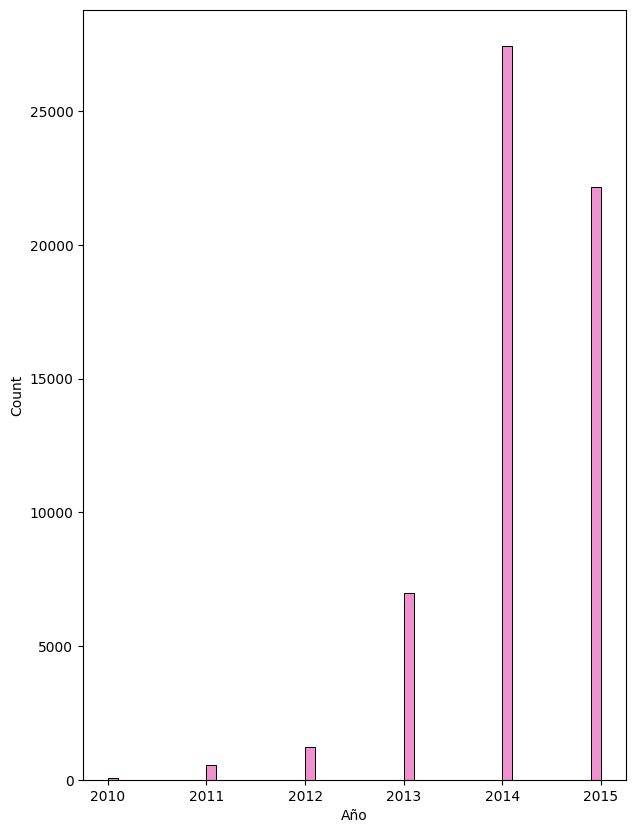

In [191]:
plt.figure(figsize=(7,10))
sns.histplot(df_reseñas['Año'], bins=50, color= '#ea6bbf');

In [189]:
df_reseñas.to_parquet("reseñas.parquet")